In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# Importing the dataset
dataset = pd.read_csv('cleve.csv')

In [3]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1    sex       303 non-null    int64  
 2    cp        303 non-null    int64  
 3    trestbps  303 non-null    float64
 4    chol      303 non-null    float64
 5    fbs       303 non-null    int64  
 6    restecg   303 non-null    int64  
 7    thalach   303 non-null    float64
 8    exang     303 non-null    int64  
 9    oldpeak   303 non-null    float64
 10   slope     303 non-null    int64  
 11   ca        303 non-null    object 
 12   thal      303 non-null    object 
 13   num       303 non-null    int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 33.3+ KB


In [5]:
dataset.shape

(303, 14)

In [6]:
#check if there any duplication
dataset.duplicated().sum()

1

In [7]:
# drop duplication

dataset.drop_duplicates(inplace=True)

In [8]:
#number of cases of heart disease in dataset
dataset[' num'].value_counts()

0    164
1    138
Name:  num, dtype: int64

In [9]:
#defining X values ang y values

X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 13].values

In [10]:
#handling missing data
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')

imputer=imputer.fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])

In [11]:
#splitting dataset into training set and test set

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.25, random_state = 101)

In [12]:
#feature scaling


s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [13]:
#### logistic regression

#fitting LR to training set

from sklearn.linear_model import LogisticRegression

LogisticRegressionClassifier =LogisticRegression()
LogisticRegressionClassifier.fit(X_train,Y_train)

LogisticRegression()

In [14]:
#Predict the test set results

Y_pred=LogisticRegressionClassifier.predict(X_test)
#checking the accuracy for predicted results

accuracy_score(Y_test,Y_pred)
# Making the Confusion Matrix

cm = confusion_matrix(Y_test, Y_pred)
#Interpretation:

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        36
           1       0.94      0.80      0.86        40

    accuracy                           0.87        76
   macro avg       0.88      0.87      0.87        76
weighted avg       0.88      0.87      0.87        76



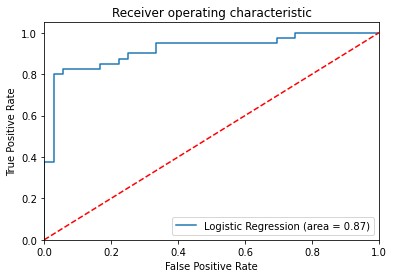

In [15]:
#ROC

logit_roc_auc = roc_auc_score(Y_test, LogisticRegressionClassifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, LogisticRegressionClassifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [16]:
##PREDICTION FOR NEW DATASET using LogisticRegressionClassifier

Newdataset = pd.read_csv('newdata.csv')
ynew=LogisticRegressionClassifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [1]


In [17]:
#### Random Forest

# Fitting RandomForestClassifier to the Training set
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier =RandomForestClassifier(n_estimators=20)
RandomForestClassifier.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=20)

In [18]:
# Predicting the Test set results
Y_pred2 = RandomForestClassifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred2)

# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred2)

#Interpretation:
print(classification_report(Y_test, Y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        36
           1       0.90      0.70      0.79        40

    accuracy                           0.80        76
   macro avg       0.82      0.81      0.80        76
weighted avg       0.82      0.80      0.80        76



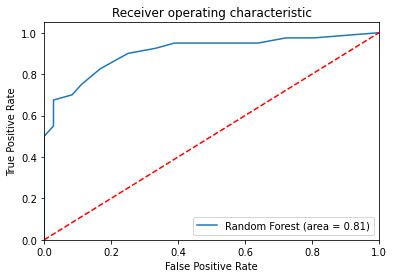

In [19]:
#ROC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, RandomForestClassifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, RandomForestClassifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

In [20]:
##PREDICTION FOR NEW DATASET using RandomForest

ynew=RandomForestClassifier.predict(Newdataset)
print("Predicted Class for newdata.csv:",ynew)

Predicted Class for newdata.csv: [1]
